# Caso 3. Regresión Lineal Múltiple con datos Adverstising. Programación Python

## Date: 19/10

## Autor:

    EZEQUIEL OLIVAS MELENDEZ

# Objetivo

Crear y evaluar un modelo de regresión lineal múltiple para predecir las ventas con datos simulados de una empresa dependiendo de las inversiones realizadas en publicidad

# Descripción

- Cargar librerías y datos

- Limpiar datos si es necesario

- Explorar datos

- Partir los datos en datos de entrenamiento y datos de validación 70% y 30%

- Crear modelo de regresión con los datos de entrenamiento

- Evaluar modelo antes de predicciones con los estadísticos. R Square ajustado y Coeficientes

- El modelo se acepta si presenta un valor de R Square ajustado por encima del 70%

- Predicciones

- Evaluar predicciones con respecto a datos reales

- Determinar el estadístico _rmse_ para evaluar con respecto a otros modelos

- Interpretar el caso

# Fundamento teórico

En la mayoría de los problemas de investigación en los que se aplica el análisis de regresión se necesita más de una variable independiente para el modelo de regresión.

La complejidad de la mayoría de mecanismos científicos es tal que, con el fin de predecir una respuesta importante, se requiere un modelo de regresión múltiple. Cuando un modelo es lineal en los coeficientes se denomina modelo de regresión lineal múltiple.

Para el caso de k variables independientes, el modelo que da $x_1,x_2,x_3...,x_k$, y $y$ como la variable dependiente.

$x_1, x_2, x_3,...,x_k$ son las variable s que afectan a la variable dependiente en el modelo de regresión lineal múltiple.

Muchos problemas de investigación y de la industria, requieren la estimación de las relaciones existentes entre el patrón de variabilidad de una variable aleatoria y los valores de una o más variables aleatorias. [@urrutiamosquera2011]

Al generar un modelo de regresión lineal múltiple es importante identificar los estadísticos de R2, que se denomina coeficiente de determinación y es una medida de la proporción de la variabilidad explicada por el modelo ajustado.

De igual forma, el valor de R2 ajustado (_R Square Adjusted_) o coeficiente de determinación ajustado, es una variación de R2 que proporciona un ajuste para los grados de libertad [@walpole2012].

El estadístico R Ajustado está diseñado para proporcionar un estadístico que castigue un modelo sobreajustado, de manera que se puede esperar que favorezca al modelo [@walpole2012].

Una variable **Y** puede predecirse conforme y de acuerdo con la siguiente fórmula de la regresión múltiple.

$$
Y = b_0 + b_1{x_1} + b_2{x_2} + b_3{x_3}+ .....b_k{x_k}
$$

# Desarrollo

Para trabajar con código Python, se deben cargan las librerías de _Python_ previamente instaladas con la función _py_install()_ de la librería _reticulate_ de R.

La función _repl_python()_ se utilizar para ejecutar ventana de comando o _shell_ de _Python._

Se recomienda instalar estos paquetes de _Python_

- _py_install(packages = "pandas")_

- _py_install(packages = "matplotlib")_

- _py_install(packages = "numpy")_

- _py_install(packages = "sklearn") en R cloud_

- _py_install("scikit-learn") R Studio local_

- _py_install(packages = "statsmodels.api")_

- _py_install(packages = "seaborn")_

- En terminal de Python se puede actualizar con c*onda create -n py3.8 python=3.8 scikit-learn pandas numpy matplotlib*

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

## Cargar datos

In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...,...,...
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5


## Explorar datos

In [3]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
datos.dtypes

Observaciones y variables:  (200, 7)
Columnas y tipo de dato


Unnamed: 0      int64
X               int64
TV            float64
Radio         float64
Newspaper     float64
Web           float64
Sales         float64
dtype: object

Se describen las variables independientes: TV, Radio Newpaper y la variable dependiente Sales.

Valor de etiqueta o variable objetivo deendiente(ventas): que significa el volumen de ventas del producto correspondiente

Las variables independientes: (TV, Radio, Periódico, WEB):

TV: para un solo producto en un mercado determinado, el costo de la publicidad en TV (en miles) Radio: costos de publicidad invertidos en medios de difusión Periódico: costos publicitarios para medios periodísticos.

In [4]:
datos[['TV','Radio', 'Newspaper', 'Web', 'Sales', ]].describe()


,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


### Dispersión de la variables con respecto a Sales.

/Users/zane/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


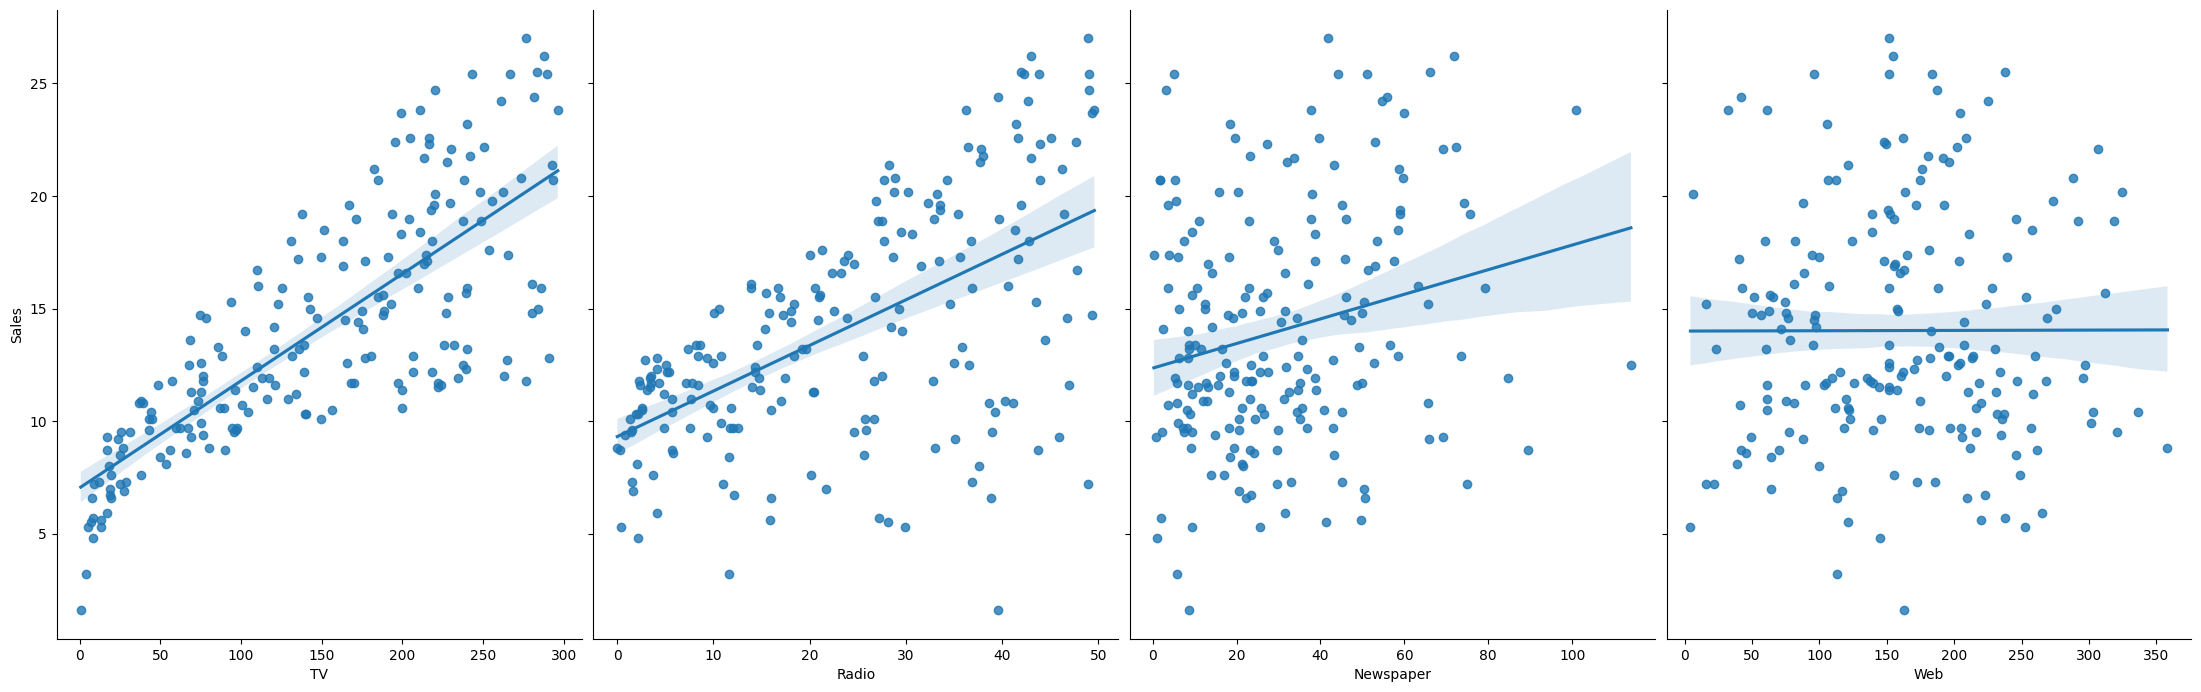

In [5]:
sns.pairplot(datos, x_vars=['TV','Radio','Newspaper', 'Web'], y_vars='Sales', size=7, aspect=0.8,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()

Se observa la relación lineal entre las variables independientes con respecto a ventas, de tal forma que es posible estimar visualmente que la variable Newspaper tal vez tenga poco impacto en las ventas esto por la alta dispersión de los datos. Sin embargo participará en el modelo de regresión lineal múltiple.

Se observa también que la variable _Web_ tiene poca correlación lineal con la variable _Sales_

## Limpiar datos

### Identificar variables independientes y dependiente

Quitar las primeras columnas y dejar TV Radio NewsPaper Web y Sales


In [6]:
print("Variables independientes ")
X_independientes = datos.iloc[:,2:6]
X_independientes

Variables independientes 


,TV,Radio,Newspaper,Web
0,230.1,37.8,69.2,306.634752
1,44.5,39.3,45.1,302.653070
2,17.2,45.9,69.3,49.498908
3,151.5,41.3,58.5,257.816893
4,180.8,10.8,58.4,195.660076
...,...,...,...,...
195,38.2,3.7,13.8,248.841073
196,94.2,4.9,8.1,118.041856
197,177.0,9.3,6.4,213.274671
198,283.6,42.0,66.2,237.498063


In [7]:
print ("Variable dependiente")
Y_dependiente = datos.iloc[:, 6:7]
Y_dependiente

Variable dependiente


,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


## Datos de entrenamiento y datos de validación

In [8]:
X_entrena,X_valida,Y_entrena,Y_valida = train_test_split(X_independientes, Y_dependiente,train_size=.70,  random_state=1287)


### Datos de entrenamiento

In [16]:
print("Estructura de datos de entrenamiento... ", X_entrena.shape)
print(X_entrena)
print(X_entrena[['TV']], X_entrena[['Radio']], X_entrena[['Newspaper']], X_entrena[['Web']])

Estructura de datos de entrenamiento...  (140, 4)
        TV  Radio  Newspaper         Web
140   73.4   17.0       12.9  174.772137
133  219.8   33.5       45.1  171.478018
24    62.3   12.6       18.3  256.965240
6     57.5   32.8       23.5  246.811598
172   19.6   20.1       17.0  155.583662
..     ...    ...        ...         ...
23   228.3   16.9       26.2   51.170073
183  287.6   43.0       71.8  154.309725
177  170.2    7.8       35.2  104.917344
106   25.0   11.0       29.7   15.938208
27   240.1   16.7       22.9  228.157437

[140 rows x 4 columns]
        TV
140   73.4
133  219.8
24    62.3
6     57.5
172   19.6
..     ...
23   228.3
183  287.6
177  170.2
106   25.0
27   240.1

[140 rows x 1 columns]      Radio
140   17.0
133   33.5
24    12.6
6     32.8
172   20.1
..     ...
23    16.9
183   43.0
177    7.8
106   11.0
27    16.7

[140 rows x 1 columns]      Newspaper
140       12.9
133       45.1
24        18.3
6         23.5
172       17.0
..         ...
23        26.2
18

## Modelo de Regresión lineal múltiple

Se construye el modelo de regresión lineal mútiple

In [17]:
modelo_rm = LinearRegression()
 
modelo_rm.fit(X_entrena,Y_entrena)

LinearRegression()

### Evaluación del modelo antes de predicciones

Se presentan los coeficientes, la intersección $\beta_0$ y los coeficientes para cada variable independiente, $\beta_1, \beta_2,\beta_3, \text{ y } \beta_4$


In [19]:
print ("Intercepción o b0") 
b0 = modelo_rm.intercept_
print (b0)
print ("Coeficientes: b1, b2, b3 y b4") 
# print (modelo_rm.coef_)
b1 = modelo_rm.coef_[0, 0:1]
b2 = modelo_rm.coef_[0, 1:2]
b3 = modelo_rm.coef_[0, 2:3]
b4 = modelo_rm.coef_[0, 3:4]
print (b1, b2, b3, b4)

Intercepción o b0
[2.26731404]
Coeficientes: b1, b2, b3 y b4
[0.046557] [0.186642] [0.00059649] [0.00333409]


$$
Prediccion:\text { Y} = b_0 + b_1\cdot {x_1} + b_2\cdot{x_2} + b_3\cdot{x_3}+b_3\cdot{x_4}
$$

$$
\text{Prediccion Sales} :\text { Y} = b_0 + b_1\cdot {TV} + b_2\cdot{Radio} + b_3\cdot{Newspaper}+b_3\cdot{Web}
$$

### R Square y R Square ajustado a a partir del modelo

Sobrepasa el 80% de tal forma que el el modelo **SE ACEPTA** por este criterio.


In [20]:
print(modelo_rm.score(X_entrena, Y_entrena))


0.8935418427743786


## Predicciones

Se hacen predicciones con los datos de validación


In [21]:
predicciones = modelo_rm.predict(X_valida)
print(predicciones[:-1])
print(predicciones.shape)


[[ 7.20109909]
 [17.84555231]
 [14.1757052 ]
 [ 6.1534468 ]
 [18.77228269]
 [16.87396839]
 [15.16481578]
 [12.36082106]
 [21.47784982]
 [ 4.73580382]
 [23.19240725]
 [17.92349206]
 [21.69002628]
 [20.01346216]
 [20.13610879]
 [14.78554039]
 [12.51389539]
 [12.58994988]
 [13.49739847]
 [21.46952359]
 [15.68013654]
 [10.35214783]
 [16.05089767]
 [16.35606729]
 [12.16773911]
 [21.61656803]
 [14.55999517]
 [12.67538087]
 [13.56209256]
 [13.59835992]
 [12.04865242]
 [ 4.4735142 ]
 [13.74584786]
 [16.07472616]
 [18.05144938]
 [ 8.05935501]
 [ 8.27197212]
 [11.78069686]
 [14.89166589]
 [ 7.43567798]
 [ 8.28103481]
 [ 5.27491562]
 [ 6.54648718]
 [14.03998618]
 [21.22821575]
 [ 3.54241561]
 [ 8.87336239]
 [14.84709018]
 [12.29531209]
 [13.45178077]
 [ 9.07782173]
 [ 7.41736389]
 [12.99859114]
 [21.54630522]
 [15.7551255 ]
 [10.0279264 ]
 [ 9.03437007]
 [ 5.00429919]
 [10.34577561]]
(60, 1)


## Evaluar predicciones

Crear un data.frame llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de entrenamiento y las predicciones calculadas.

Se usa el *type()* para conocer el tipo de estructura de datos

Se usa el *assign()* para agregar columnas al df comparaciones

Se usa *flatten().tolist()* para convertir a una lista de una dimensión.

Al final se tiene un d*ata.frame* llamado comparaciones en donde las últimas columnas tienen los valores reales de 'Sales' y las predicciones en la variable 'Predicho'.


In [22]:
print(type(X_valida))
print(type(predicciones))
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Sales_Real = Y_valida)
comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())
print(comparaciones)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
        TV  Radio  Newspaper         Web  Sales_Real   Predicho
127   80.2    0.0        9.2  358.247042         8.8   7.201099
105  137.9   46.4       59.0  138.762632        19.2  17.845552
171  164.5   20.9       47.4   96.180391        14.5  14.175705
189   18.7   12.1       23.4  222.906951         6.7   6.153447
142  220.5   33.2       37.9    6.007436        20.1  18.772283
89   109.8   47.8       51.4  162.727890        16.7  16.873968
154  187.8   21.1        9.5   63.071208        15.6  15.164816
179  165.6   10.0       17.6  151.990733        12.6  12.360821
93   250.9   36.5       72.3  202.102158        22.2  21.477850
192   17.2    4.1       31.6  265.028644         5.9   4.735804
36   266.9   43.8        5.0   96.316829        25.4  23.192407
3    151.5   41.3       58.5  257.816893        18.5  17.923492
42   293.6   27.7        1.8  174.716820        20.7  21.690026
53   182.6   46.2       58.7  176.050052  

### RMSE

_rmse_ Root Mean Stándard Error (_Root-mean-square deviation_), este valor normalmente se compara contra otro modelo y el que esté mas cerca de cero es mejor.

La raiz del Error Cuadrático Medio (_rmse_) es una métrica que dice qué tan lejos están los valores predichos de los valores observados o reales en un análisis de regresión, en promedio. Se calcula como:

$$
rmse = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$

_RMSE_ es una forma útil de ver qué tan bien un modelo de regresión puede ajustarse a un conjunto de datos.

Cuanto mayor sea el _rmse_, mayor será la diferencia entre los valores predichos y reales, lo que significa que peor se ajusta un modelo de regresión a los datos. Por el contrario, cuanto más pequeño sea el rmse, mejor podrá un modelo ajustar los datos.


In [23]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Y_valida, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones)))

Mean Squared Error: MSE 2.2762743655837125
Root Mean Squared Error RMSE: 1.5087327018341297


# Interpretación

Con este modelo y con estos datos interprete lo siguiente:

- ¿Cuál es el contexto de los datos?
Que los datos representan la cantidad de inversión de una empresa en varios canales de publicidad para vender 

- ¿Cuántas observaciones se analizan y cuáles son las variables de interés?
4 y son TV, Radio, Newspaper y web


- ¿Cuáles son las variables independientes y dependientes?
Sales
TV, Radio, Newspaper, Web

- ¿Cuál es el porcentaje de datos de entrenamiento y datos de validación ?
70 y 30%

- ¿Son los coeficientes confiables al menos al 90% para hacer predicciones?,
No, pero casi es el 90

- ¿Cuál nivel de confianza para cada coeficiente?
[0.046557] [0.186642] [0.00059649] [0.00333409]

- ¿Que valor tiene el estadístico el _R Square_ ajustado y que representa o qué significa?
0.8935418427743786 y representa que la variabilidad de las predicciones entran dentro de los requisitos

- ¿Cuál es el valor de _RMSE_ y qué significaría este valor
1.5087327018341297 y significa que que el modelo puede ajustarse a los datos


- ¿Puede haber otro modelo más óptimo para estos datos?
Seguramente por la dispersión de los datos

- ¿Que tan confiables son las predicciones con datos nuevos con este modelo y con estos datos?
Lo suficiente para usar las predicciones del modelo
